# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Read the data
df = pd.read_csv('data.csv')


In [3]:
print(df.head())

                      Model  Range (km)  Battery size (kWh)  \
0  Abarth 500e Convertible          225                37.8   
1    Abarth 500e Hatchback          225                37.8   
2                Aiways U5          315                60.0   
3                Aiways U6          350                60.0   
4   Audi e-tron GT quattro          420                85.0   

   Efficiency (kWh/100km)  Fastcharge speed (km/h)  Price (approx.) €   
0                      17                      370               41200  
1                      17                      370               38200  
2                      19                      380               41300  
3                      17                      430               48300  
4                      20                     1030              108600  


In [8]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.shape

(343, 6)

In [12]:
dir(df)

['Model',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__r

In [13]:
df.columns

Index(['Model', 'Range (km)', 'Battery size (kWh)', 'Efficiency (kWh/100km)',
       'Fastcharge speed (km/h)', 'Price (approx.) € '],
      dtype='object')

In [43]:
data = pd.DataFrame()

#Conversion rate on 20 December 2023 is 1 Euro = 0.88 GBP
conversion_rate = 0.88

#Convert the price from Euro to GBP
data['PRICE']= df['Price (approx.) €\xa0']* conversion_rate

#Conver the range from km to miles
data['RANGE']= df['Range (km)'] * 0.621371

#Convert the Efficiency from kWh/100km to mi/kWh
data['EFFICIENCY'] = 100/1.609344/df['Efficiency (kWh/100km)']

#Battery size (kWh)
data['BATTERY'] = df['Battery size (kWh)']

#Fastcharge speed (m/h)
data['FASTCHARGE'] = df['Fastcharge speed (km/h)'] * 0.621371

data.head()


,PRICE,RANGE,EFFICIENCY,BATTERY,FASTCHARGE
0,36256.0,139.808475,3.655125,37.8,229.90727
1,33616.0,139.808475,3.655125,37.8,229.90727
2,36344.0,195.731865,3.270375,60.0,236.12098
3,42504.0,217.479850,3.655125,60.0,267.18953
4,95568.0,260.975820,3.106856,85.0,640.01213


## Data Exploration with Pandas Dataframes

In [44]:
data.count()



PRICE         343
RANGE         343
EFFICIENCY    343
BATTERY       343
FASTCHARGE    343
dtype: int64

## Cleaning Data - Checking for Missing Values

In [45]:
#use isnulll() to find missing values
pd.isnull(data).any()

PRICE         False
RANGE         False
EFFICIENCY    False
BATTERY       False
FASTCHARGE    False
dtype: bool

In [46]:
data.info() #The info() method prints information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRICE       343 non-null    float64
 1   RANGE       343 non-null    float64
 2   EFFICIENCY  343 non-null    float64
 3   BATTERY     343 non-null    float64
 4   FASTCHARGE  343 non-null    float64
dtypes: float64(5)
memory usage: 13.5 KB


# Visualising Data - Histograms, Distributions and Bar Charts

### Price Distribution

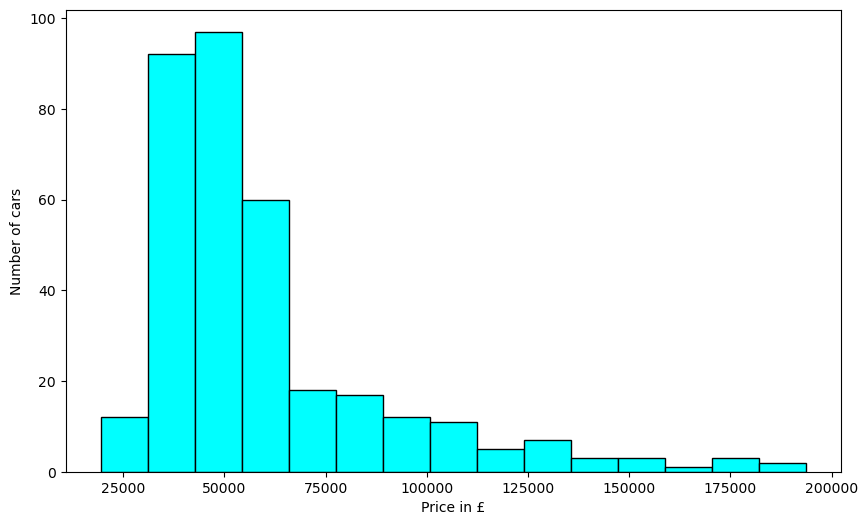

In [54]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=15, ec='black', color='aqua')
plt.xlabel('Price in £')
plt.ylabel('Number of cars')
plt.show()

### Range Distribution

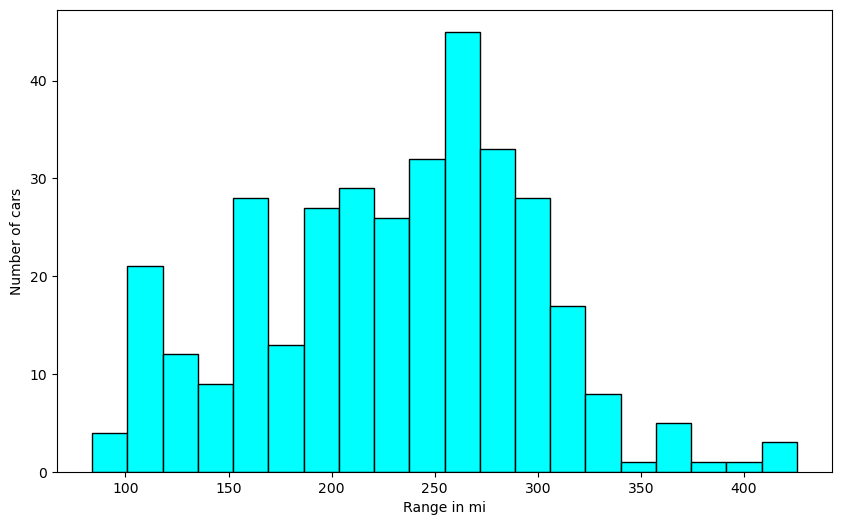

In [52]:
plt.figure(figsize=(10,6))
plt.hist(data['RANGE'], bins=20, ec='black', color='aqua')
plt.xlabel('Range in mi')
plt.ylabel('Number of cars')
plt.show()

### Efficiency (mi/kWh) Distribution

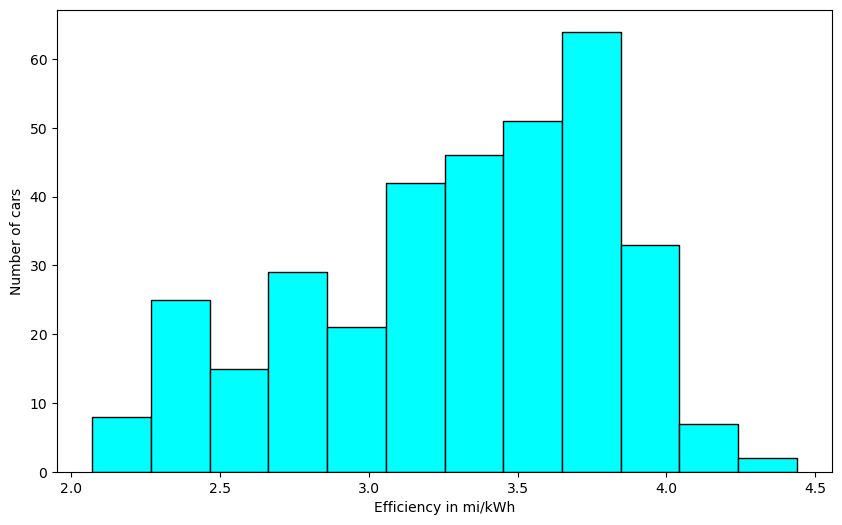

In [60]:
plt.figure(figsize=(10,6))
plt.hist(data['EFFICIENCY'], bins=12, ec='black', color='aqua')
plt.xlabel('Efficiency in mi/kWh')
plt.ylabel('Number of cars')
plt.show()

### Battery Capacity Distribution

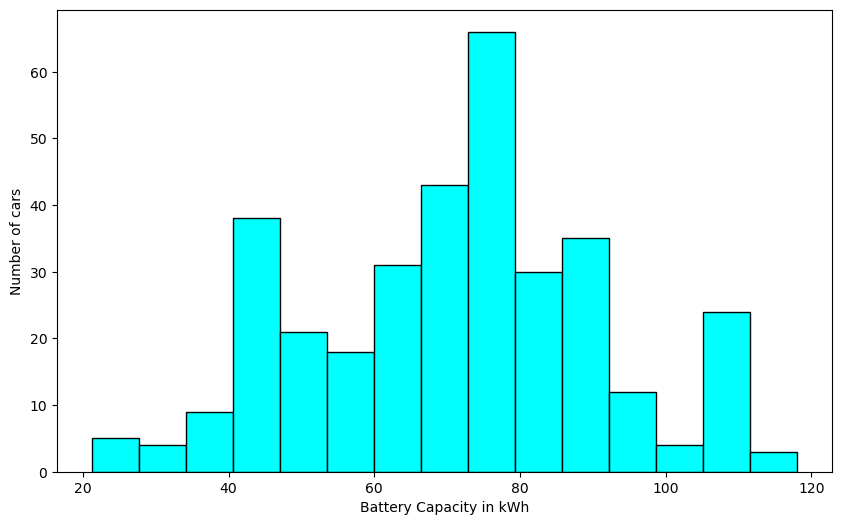

In [56]:
plt.figure(figsize=(10,6))
plt.hist(data['BATTERY'], bins=15, ec='black', color='aqua')
plt.xlabel('Battery Capacity in kWh')
plt.ylabel('Number of cars')
plt.show()

### Fastcharge Rate Distribution

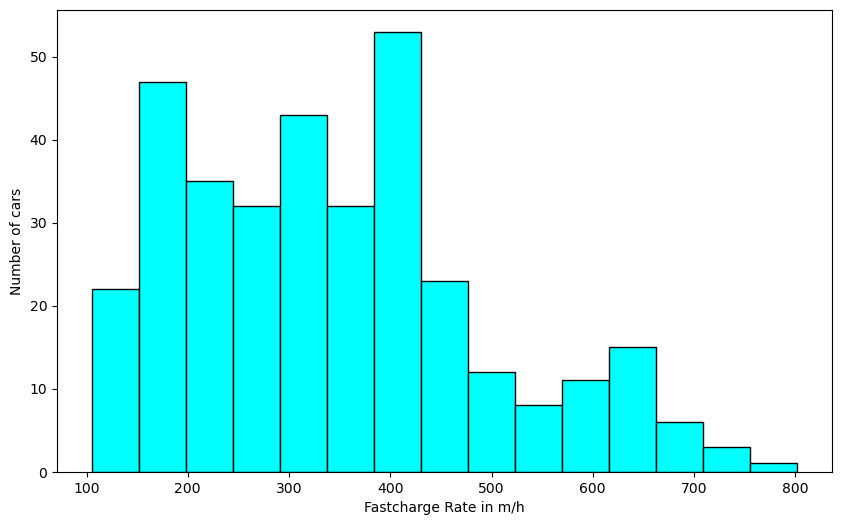

In [62]:
plt.figure(figsize=(10,6))
plt.hist(data['FASTCHARGE'], bins=15, ec='black', color='aqua')
plt.xlabel('Fastcharge Rate in m/h')
plt.ylabel('Number of cars')
plt.show()

## Descriptive Statistics